In [1]:
# Importanfo as bibliotecas
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [2]:
#Definindo o dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
print(X.shape, y.shape)

(1000, 100) (1000,)


In [3]:
#Dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Aplicando a normalização min-max
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [4]:
print(X_train.shape,X_test.shape)

(670, 100) (330, 100)


In [92]:
#Pegando os números de input
n_inputs = X.shape[1]
#definindo o encoder
visible = Input(shape=(n_inputs,))

In [93]:
#Encoder nível 1. Definindo a primeira camada oculta
e = Dense(n_inputs*2)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [94]:
# Encoder nível 2. Definindo a segunda camada oculta
e = Dense(n_inputs)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [95]:
#Camada de redução. aqui que acontece a redução
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

In [96]:
#Definindo o decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [97]:
#Definindo o decoder nível 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [98]:
#Camada de saída usando a função de ativação
#É a função mais básica porque não altera a saída de um neurônio
output = Dense(n_inputs, activation='linear')(d)

In [99]:
#definindo o modelo de autoencoder model
model = Model(inputs=visible, outputs=output)

In [100]:
#Compilando o modelo autoencoder
#adam =  função com base no método de descida gradiente estocástico. Tende a convergir rapidamente.
#binary_crossentropy  = um função utilizada para problemas de classificação binária (0 ou 1)
# mse = calcula a média dos quadrados dos erros entre rótulos e previsões
model.compile(optimizer='adam', loss='binary_crossentropy')
#model.compile(optimizer='adam', loss='mse')

In [101]:
#Ajustar o modelo autoencoder para reconstruir a entrada 
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/200
42/42 - 2s - loss: 4.6678 - val_loss: 3.4298
Epoch 2/200
42/42 - 0s - loss: 3.8389 - val_loss: 2.8597
Epoch 3/200
42/42 - 0s - loss: 3.6029 - val_loss: 2.2791
Epoch 4/200
42/42 - 0s - loss: 3.2925 - val_loss: 1.8988
Epoch 5/200
42/42 - 0s - loss: 3.0694 - val_loss: 1.9541
Epoch 6/200
42/42 - 0s - loss: 3.0430 - val_loss: 1.9511
Epoch 7/200
42/42 - 0s - loss: 2.9203 - val_loss: 1.9747
Epoch 8/200
42/42 - 0s - loss: 2.8220 - val_loss: 2.1027
Epoch 9/200
42/42 - 0s - loss: 2.7595 - val_loss: 2.1290
Epoch 10/200
42/42 - 0s - loss: 2.5980 - val_loss: 2.1331
Epoch 11/200
42/42 - 0s - loss: 2.5160 - val_loss: 2.2668
Epoch 12/200
42/42 - 0s - loss: 2.5459 - val_loss: 2.2966
Epoch 13/200
42/42 - 0s - loss: 2.6302 - val_loss: 2.6025
Epoch 14/200
42/42 - 0s - loss: 2.6802 - val_loss: 2.8875
Epoch 15/200
42/42 - 0s - loss: 2.8067 - val_loss: 2.8424
Epoch 16/200
42/42 - 0s - loss: 2.8689 - val_loss: 3.1900
Epoch 17/200
42/42 - 0s - loss: 2.8448 - val_loss: 2.9125
Epoch 18/200
42/42 - 0s

Epoch 142/200
42/42 - 0s - loss: 1.9753 - val_loss: 2.0018
Epoch 143/200
42/42 - 0s - loss: 2.0162 - val_loss: 2.0127
Epoch 144/200
42/42 - 0s - loss: 1.9678 - val_loss: 2.0011
Epoch 145/200
42/42 - 0s - loss: 2.0325 - val_loss: 2.0228
Epoch 146/200
42/42 - 0s - loss: 1.9670 - val_loss: 1.9178
Epoch 147/200
42/42 - 0s - loss: 1.9453 - val_loss: 1.9621
Epoch 148/200
42/42 - 0s - loss: 1.9419 - val_loss: 1.9492
Epoch 149/200
42/42 - 0s - loss: 1.9142 - val_loss: 1.9111
Epoch 150/200
42/42 - 0s - loss: 1.8673 - val_loss: 2.0630
Epoch 151/200
42/42 - 0s - loss: 1.8851 - val_loss: 1.9712
Epoch 152/200
42/42 - 0s - loss: 1.8779 - val_loss: 1.9197
Epoch 153/200
42/42 - 0s - loss: 1.9072 - val_loss: 2.0097
Epoch 154/200
42/42 - 0s - loss: 1.9649 - val_loss: 2.0132
Epoch 155/200
42/42 - 0s - loss: 1.9828 - val_loss: 1.9922
Epoch 156/200
42/42 - 0s - loss: 1.9370 - val_loss: 1.9484
Epoch 157/200
42/42 - 0s - loss: 1.8941 - val_loss: 1.9060
Epoch 158/200
42/42 - 0s - loss: 1.9100 - val_loss: 1.91

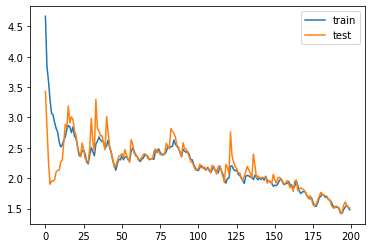

In [102]:
# COm a função de perda binary_crossentropy
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

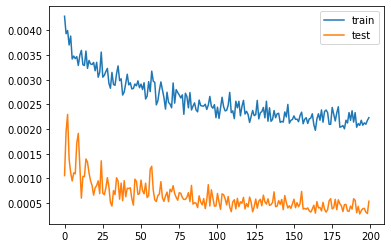

In [80]:
# Com a função de perda mse
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [103]:
# definir um modelo de codificador (sem o decodificador) 
encoder = Model(inputs=visible, outputs=bottleneck)

In [104]:
# salvo o encoder para usar depois
encoder.save('encoder.h5')

## Treinando um modelo de regressão logística diretamente no conjunto de dados de treinamento. Não estou utilizando ainda o rede neural.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [106]:
#Definindo o dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
#Dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Aplicando a normalização min-max
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [107]:
#Define o modelo
model = LogisticRegression()
#Ajuste do modelo do conjunto de treinamento
model.fit(X_train, y_train)
#Faz a predição no conjunto de teste
yhat = model.predict(X_test)
#Calcula accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8939393939393939


## Vamos treinar o modelo preditivo na autoencoder

In [108]:
# Carrega o modelo
from tensorflow.keras.models import load_model
encoder = load_model('encoder.h5')

In [109]:
# Treinando no encoder
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

In [110]:
#Define o modelo
model = LogisticRegression()
#Ajuste do modelo do conjunto de treinamento
model.fit(X_train_encode, y_train)
#Faz a predição no conjunto de teste
yhat = model.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9393939393939394


/home/joseluiz/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Referências

### MONOLITONIMBUS. Disponível em: https://www.monolitonimbus.com.br/modelo-sequencial-do-keras/. Acesso em: 21/11/2021.
### MACHINELEARNINGMASTERY. Disponível em: https://machinelearningmastery.com/autoencoder-for-classification/.Acesso em 21/11/2021
### KERAS. Disponível em: https://keras.io/api/losses/. Acesso em 21/11/2021.